### Data Description

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

https://www.youtube.com/watch?v=GrJP9FLV3FE&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ&index=5

## Loading Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
import graphviz

## Import the data

In [4]:
df = pd.read_excel(r'Telco_customer_churn.xlsx')
df.head()

Count        Country       State         City  Zip Code   Latitude  \
0      1  United States  California  Los Angeles     90003  33.964131   
1      1  United States  California  Los Angeles     90005  34.059281   
2      1  United States  California  Los Angeles     90006  34.048013   
3      1  United States  California  Los Angeles     90010  34.062125   
4      1  United States  California  Los Angeles     90015  34.039224   

    Longitude  Gender Senior Citizen Partner  ...        Contract  \
0 -118.272783    Male             No      No  ...  Month-to-month   
1 -118.307420  Female             No      No  ...  Month-to-month   
2 -118.293953  Female             No      No  ...  Month-to-month   
3 -118.315709  Female             No     Yes  ...  Month-to-month   
4 -118.266293    Male             No      No  ...  Month-to-month   

   Paperless Billing             Payment Method Monthly Charges Total Charges  \
0                Yes               Mailed check           53.85        108.15   
1                Yes           Electronic check           70.70        151.65   
2                Yes           Electronic check           99.65         820.5   
3                Yes           Electronic check          104.80       3046.05   
4                Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 31 columns]

In [4]:
df.shape

(7043, 31)

In [5]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],axis = 1,inplace = True)

In [6]:
df.head()

Count        Country       State         City  Zip Code   Latitude  \
0      1  United States  California  Los Angeles     90003  33.964131   
1      1  United States  California  Los Angeles     90005  34.059281   
2      1  United States  California  Los Angeles     90006  34.048013   
3      1  United States  California  Los Angeles     90010  34.062125   
4      1  United States  California  Los Angeles     90015  34.039224   

    Longitude  Gender Senior Citizen Partner  ... Device Protection  \
0 -118.272783    Male             No      No  ...                No   
1 -118.307420  Female             No      No  ...                No   
2 -118.293953  Female             No      No  ...               Yes   
3 -118.315709  Female             No     Yes  ...               Yes   
4 -118.266293    Male             No      No  ...               Yes   

   Tech Support Streaming TV Streaming Movies        Contract  \
0            No           No               No  Month-to-month   
1            No           No               No  Month-to-month   
2            No          Yes              Yes  Month-to-month   
3           Yes          Yes              Yes  Month-to-month   
4            No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 27 columns]

In [7]:
df['Count'].unique()

array([1], dtype=int64)

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
df['State'].unique()

array(['California'], dtype=object)

In [10]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [11]:
df.drop(['Count','Country','State'],axis=1,inplace=True)

In [12]:
df

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0      Los Angeles     90003  33.964131 -118.272783    Male             No   
1      Los Angeles     90005  34.059281 -118.307420  Female             No   
2      Los Angeles     90006  34.048013 -118.293953  Female             No   
3      Los Angeles     90010  34.062125 -118.315709  Female             No   
4      Los Angeles     90015  34.039224 -118.266293    Male             No   
...            ...       ...        ...         ...     ...            ...   
7038       Landers     92285  34.341737 -116.539416  Female             No   
7039      Adelanto     92301  34.667815 -117.536183    Male             No   
7040         Amboy     92304  34.559882 -115.637164  Female             No   
7041  Angelus Oaks     92305  34.167800 -116.864330  Female             No   
7042  Apple Valley     92308  34.424926 -117.184503    Male             No   

     Partner Dependents  Tenure Months Phone Service  ...  \
0         No         No              2           Yes  ...   
1         No        Yes              2           Yes  ...   
2         No        Yes              8           Yes  ...   
3        Yes        Yes             28           Yes  ...   
4         No        Yes             49           Yes  ...   
...      ...        ...            ...           ...  ...   
7038      No         No             72           Yes  ...   
7039     Yes        Yes             24           Yes  ...   
7040     Yes        Yes             72           Yes  ...   
7041     Yes        Yes             11            No  ...   
7042      No         No             66           Yes  ...   

        Device Protection         Tech Support         Streaming TV  \
0                      No                   No                   No   
1                      No                   No                   No   
2                     Yes                   No                  Yes   
3                     Yes                  Yes                  Yes   
4                     Yes                   No                  Yes   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                  Yes                  Yes                  Yes   
7040                  Yes                   No                  Yes   
7041                   No                   No                   No   
7042                  Yes                  Yes                  Yes   

         Streaming Movies        Contract Paperless Billing  \
0                      No  Month-to-month               Yes   
1                      No  Month-to-month               Yes   
2                     Yes  Month-to-month               Yes   
3                     Yes  Month-to-month               Yes   
4                     Yes  Month-to-month               Yes   
...                   ...             ...               ...   
7038  No internet service        Two year               Yes   
7039                  Yes        One year               Yes   
7040                  Yes        One year               Yes   
7041                   No  Month-to-month               Yes   
7042                  Yes        Two year               Yes   

                 Payment Method Monthly Charges Total Charges Churn Value  
0                  Mailed check           53.85        108.15           1  
1              Electronic check           70.70        151.65           1  
2              Electronic check           99.65         820.5           1  
3              Electronic check          104.80       3046.05           1  
4     Bank transfer (automatic)          103.70        5036.3           1  
...                         ...             ...           ...         ...  
7038  Bank transfer (automatic)           21.15        1419.4           0  
7039               Mailed check           84.80        1990.5           0  
7040    Credit card (automatic)          103.20   

### Removing Whitespaces

To draw a tree we can't have white spaces like in City column

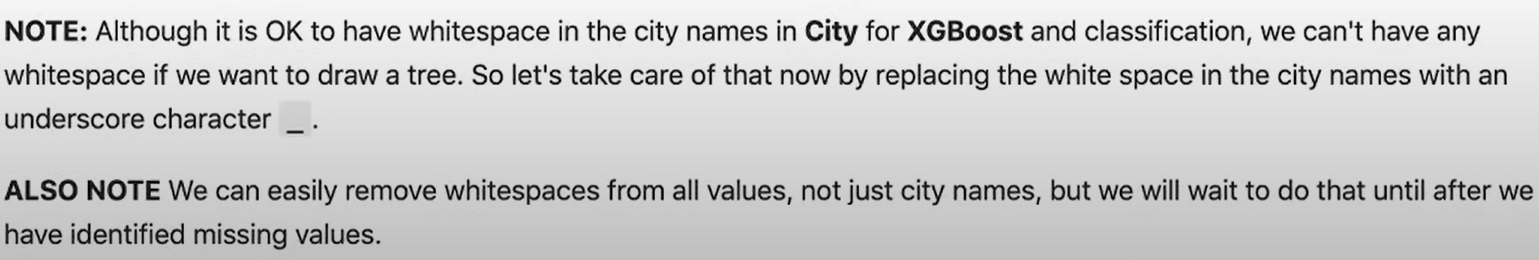

In [13]:
df['City'].replace(' ', '_', regex =True, inplace = True)
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [14]:
df['City'].unique()[:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [15]:
df.columns = df.columns.str.replace(' ','_')
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

## Missing Data

XGBoost can handle "Null values" it just that it needs to be converted into 0.

In [16]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [17]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

##### total_charges column has float numbers but data type is object

In [18]:
len(df.loc[df['Total_Charges'] == ' '])

11

11 rows have missing values

In [19]:
df.loc[df['Total_Charges'] == ' ']

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55                         0  
2438               Mailed check           20.25                         0  
2568               Mailed check           80.85                         0  
2667               Mailed check           25.75                         0  
2856    Credit card (automatic)           56.05                         0  
4331               Mailed check           19.85                         0  
4687               Mailed check           25.35                         0  
5104               Mailed check           20.00                         0  
5719               Mailed check           19.70                         0  
6772               Maile

In [20]:
df.loc[(df['Total_Charges'] == ' '),'Total_Charges'] = 0 # setting total charge = 0

In [21]:
df.loc[df['Tenure_Months'] == 0]

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55             0           0  
2438               Mailed check           20.25             0           0  
2568               Mailed check           80.85             0           0  
2667               Mailed check           25.75             0           0  
2856    Credit card (automatic)           56.05             0           0  
4331               Mailed check           19.85             0           0  
4687               Mailed check           25.35             0           0  
5104               Mailed check           20.00             0           0  
5719               Mailed check           19.70             0           0  
6772               Maile

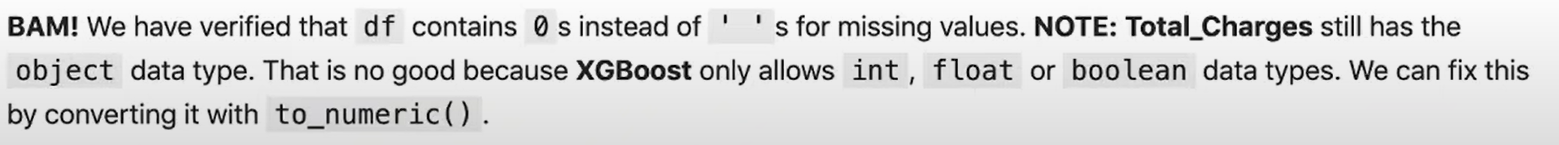

#### Converting datatypes to float

In [22]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

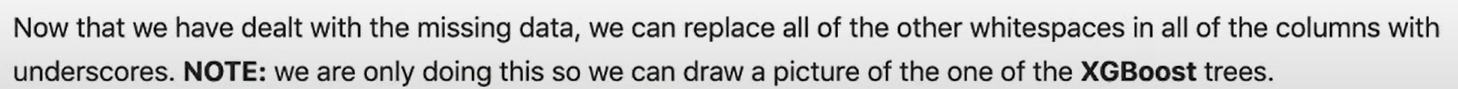

In [23]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed_check           53.85        108.15   
1               Yes           Electronic_check           70.70        151.65   
2               Yes           Electronic_check           99.65        820.50   
3               Yes           Electronic_check          104.80       3046.05   
4               Yes  Bank_transfer_(automatic)          103.70       5036.30   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

## Splitting data into Dependent and Independent Features

In [24]:
X = df.iloc[:,:-1]
X.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Online_Backup  \
0      No         No              2           Yes  ...           Yes   
1      No        Yes              2           Yes  ...            No   
2      No        Yes              8           Yes  ...            No   
3     Yes        Yes             28           Yes  ...            No   
4      No        Yes             49           Yes  ...           Yes   

  Device_Protection Tech_Support Streaming_TV Streaming_Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless_Billing             Payment_Method  \
0  Month-to-month               Yes               Mailed_check   
1  Month-to-month               Yes           Electronic_check   
2  Month-to-month               Yes           Electronic_check   
3  Month-to-month               Yes           Electronic_check   
4  Month-to-month               Yes  Bank_transfer_(automatic)   

  Monthly_Charges Total_Charges  
0           53.85        108.15  
1           70.70        151.65  
2           99.65        820.50  
3          104.80       3046.05  
4          103.70       5036.30  

[5 rows x 23 columns]

In [25]:
y = df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn_Value, Length: 7043, dtype: int64

In [26]:
y.unique()

array([1, 0], dtype=int64)

In [27]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

## ONE - HOT ENCODING

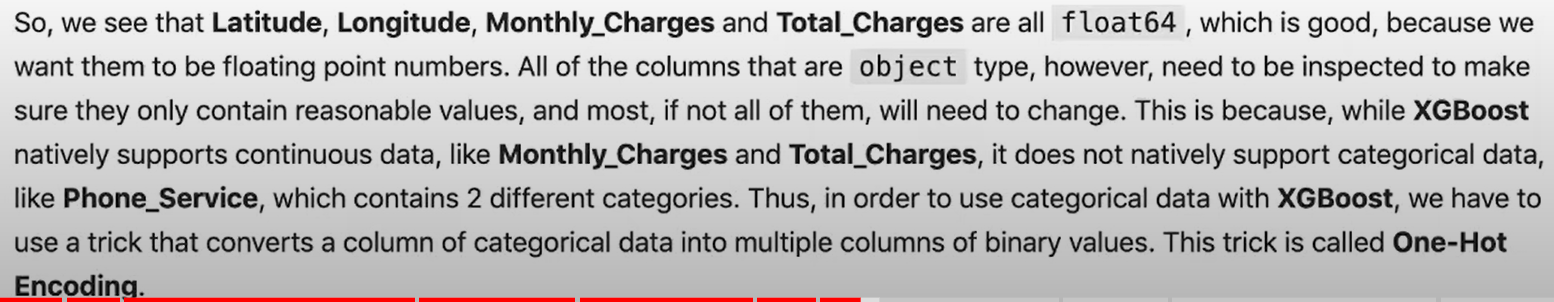

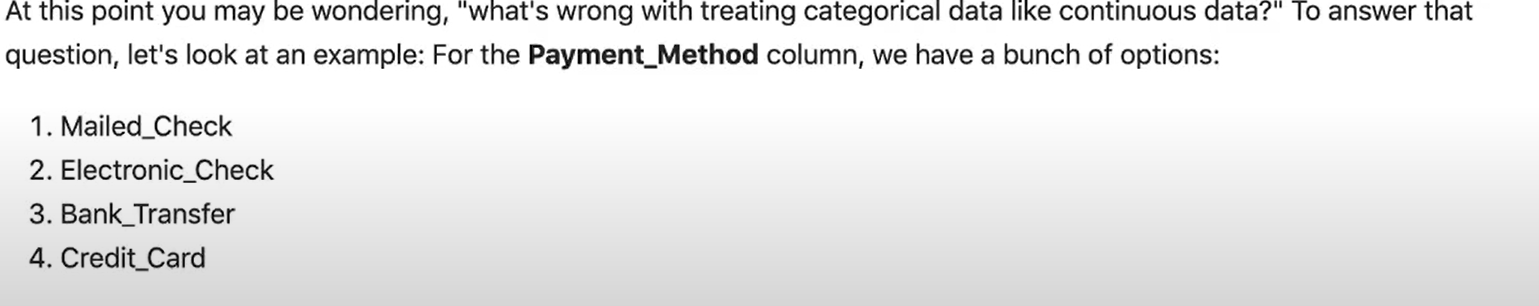

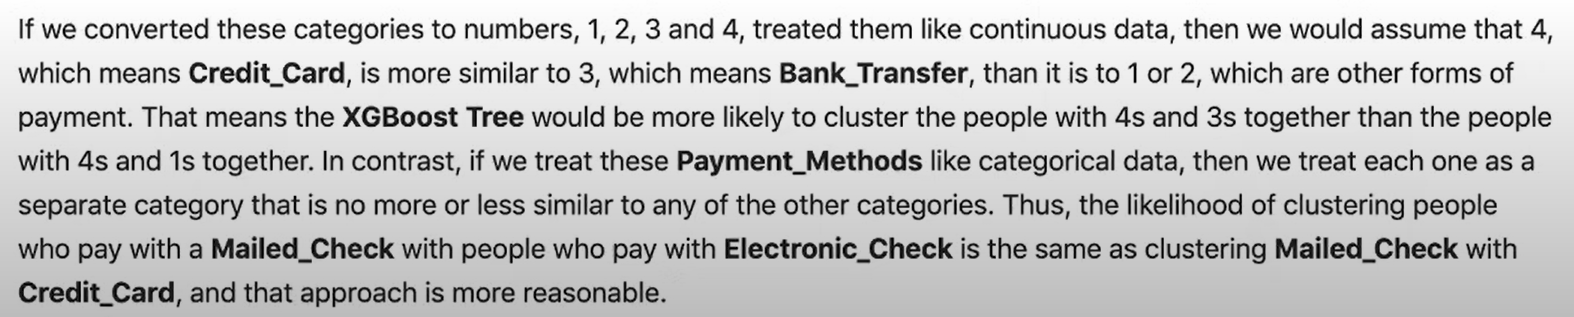

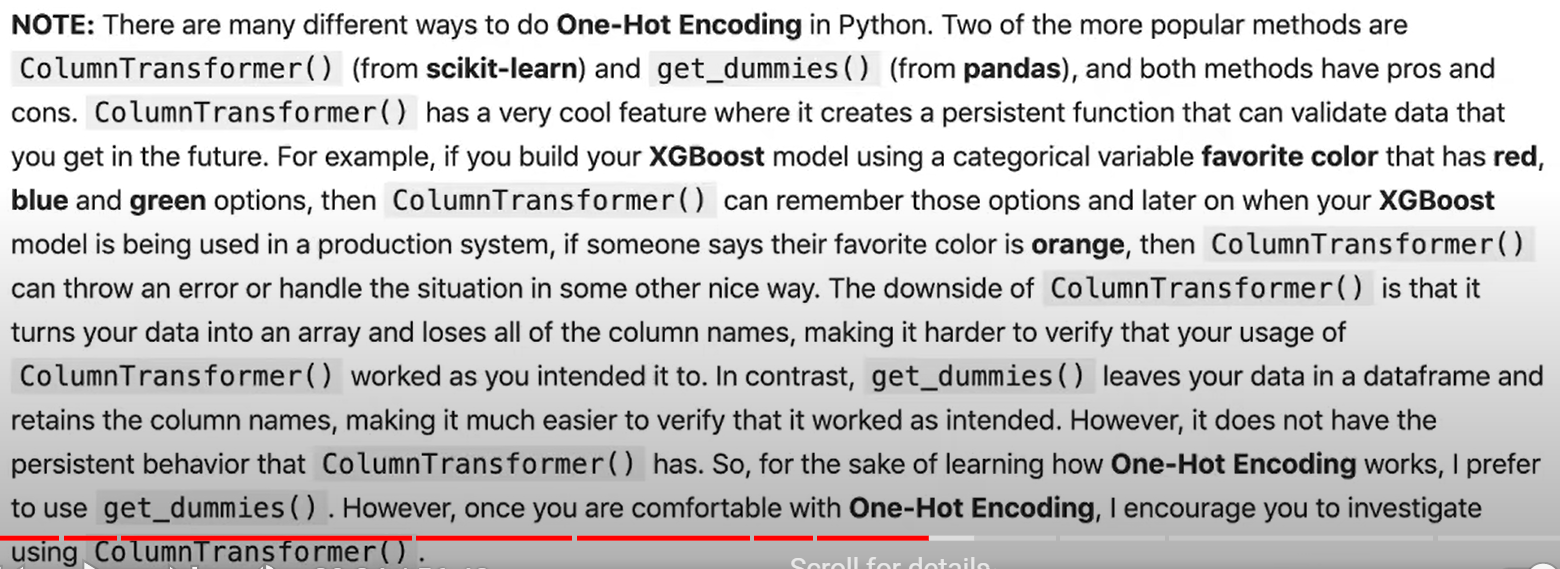

### Using get_dummies under One-Hot Encoding

In [28]:
pd.get_dummies(X,columns=['Payment_Method']).head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Streaming_TV  \
0      No         No              2           Yes  ...           No   
1      No        Yes              2           Yes  ...           No   
2      No        Yes              8           Yes  ...          Yes   
3     Yes        Yes             28           Yes  ...          Yes   
4      No        Yes             49           Yes  ...          Yes   

  Streaming_Movies        Contract Paperless_Billing Monthly_Charges  \
0               No  Month-to-month               Yes           53.85   
1               No  Month-to-month               Yes           70.70   
2              Yes  Month-to-month               Yes           99.65   
3              Yes  Month-to-month               Yes          104.80   
4              Yes  Month-to-month               Yes          103.70   

  Total_Charges Payment_Method_Bank_transfer_(automatic)  \
0        108.15                                        0   
1        151.65                                        0   
2        820.50                                        0   
3       3046.05                                        0   
4       5036.30                                        1   

  Payment_Method_Credit_card_(automatic) Payment_Method_Electronic_check  \
0                                      0                               0   
1                                      0                               1   
2                                      0                               1   
3                                      0                               1   
4                                      0                               0   

  Payment_Method_Mailed_check  
0                           1  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 26 columns]

<br></br>
### NOTE: ONE HOT ENCODING is good for Trees, But not good for LINEAR or LOGISTIC Regression
<br></br>

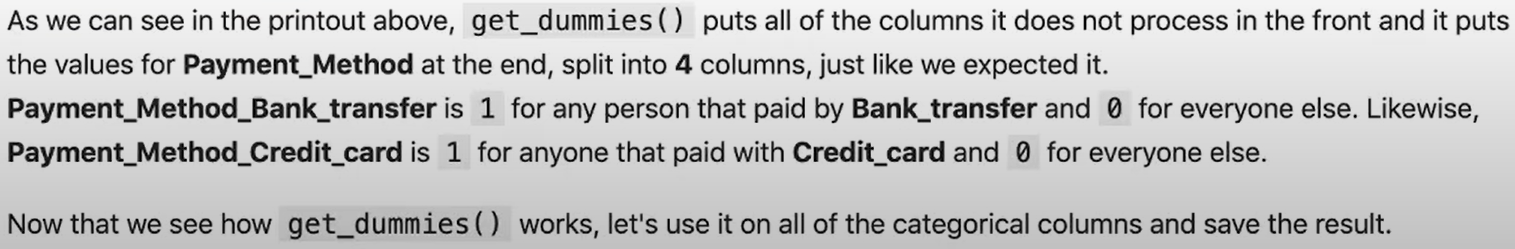

In [29]:
X.dtypes == 'object'

City                  True
Zip_Code             False
Latitude             False
Longitude            False
Gender                True
Senior_Citizen        True
Partner               True
Dependents            True
Tenure_Months        False
Phone_Service         True
Multiple_Lines        True
Internet_Service      True
Online_Security       True
Online_Backup         True
Device_Protection     True
Tech_Support          True
Streaming_TV          True
Streaming_Movies      True
Contract              True
Paperless_Billing     True
Payment_Method        True
Monthly_Charges      False
Total_Charges        False
dtype: bool

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
X_encoded = pd.get_dummies(X,columns=['City',
                                      'Gender',
                                      'Senior_Citizen',
                                      'Partner',
                                      'Dependents',
                                      'Phone_Service',
                                      'Multiple_Lines',
                                      'Internet_Service',
                                      'Online_Security',
                                      'Online_Backup',
                                      'Device_Protection',
                                      'Tech_Support',
                                      'Streaming_TV',
                                      'Streaming_Movies',
                                      'Contract',
                                      'Paperless_Billing',
                                      'Payment_Method'])
X_encoded.head()

Zip_Code   Latitude   Longitude  Tenure_Months  Monthly_Charges  \
0     90003  33.964131 -118.272783              2            53.85   
1     90005  34.059281 -118.307420              2            70.70   
2     90006  34.048013 -118.293953              8            99.65   
3     90010  34.062125 -118.315709             28           104.80   
4     90015  34.039224 -118.266293             49           103.70   

   Total_Charges  City_Acampo  City_Acton  City_Adelanto  City_Adin  \
0         108.15            0           0              0          0   
1         151.65            0           0              0          0   
2         820.50            0           0              0          0   
3        3046.05            0           0              0          0   
4        5036.30            0           0              0          0   

   City_Agoura_Hills  City_Aguanga  City_Ahwahnee  City_Alameda  City_Alamo  \
0                  0             0              0             0           0   
1                  0             0              0             0           0   
2                  0             0              0             0           0   
3                  0             0              0             0           0   
4                  0             0              0             0           0   

   City_Albany  City_Albion  City_Alderpoint  City_Alhambra  City_Aliso_Viejo  \
0            0            0                0              0                 0   
1            0            0                0              0                 0   
2            0            0                0              0                 0   
3            0            0                0              0                 0   
4            0            0                0              0                 0   

   City_Alleghany  City_Alpaugh  City_Alpine  City_Alta  City_Altadena  \
0               0             0            0          0              0   
1               0             0            0          0              0   
2               0             0            0          0              0   
3               0             0            0          0              0   
4               0             0            0          0              0   

   City_Alturas  City_Alviso  City_Amador_City  City_Amboy  City_Anaheim  \
0             0            0                 0           0             0   
1             0            0                 0           0             0   
2             0            0                 0           0             0   
3             0            0                 0           0             0   
4             0            0                 0           0             0   

   City_Anderson  City_Angels_Camp  City_Angelus_Oaks  City_Angwin  \
0              0                 0                  0            0   
1              0                 0                  0            0   
2              0                 0                  0            0   
3              0                 0                  0            0   
4              0                 0                  0            0   

   City_Annapolis  City_Antelope  City_Antioch  City_Anza  City_Apple_Valley  \
0               0              0             0          0                  0   
1               0              0             0          0                  0   
2               0              0             0          0                  0   
3               0              0             0          0                  0   
4               0              0             0          0                  0   

   City_Applegate  City_Aptos  City_Arbuckle  City_Arcadia  City_Arcata  \
0               0           0              0             0            0   
1               0           0              0             0            0   
2               0           0              0             0            0   
3               0           0              0             0            0   
4             

In [32]:
X_encoded.shape

(7043, 1178)

In [33]:
X_encoded.dtypes

Zip_Code                                      int64
Latitude                                    float64
Longitude                                   float64
Tenure_Months                                 int64
Monthly_Charges                             float64
                                             ...   
Paperless_Billing_Yes                         uint8
Payment_Method_Bank_transfer_(automatic)      uint8
Payment_Method_Credit_card_(automatic)        uint8
Payment_Method_Electronic_check               uint8
Payment_Method_Mailed_check                   uint8
Length: 1178, dtype: object

In [34]:
y.unique()

array([1, 0], dtype=int64)

## Build A Preliminary XGBoost Model

In [35]:
sum(y)/len(y)

0.2653698707936959

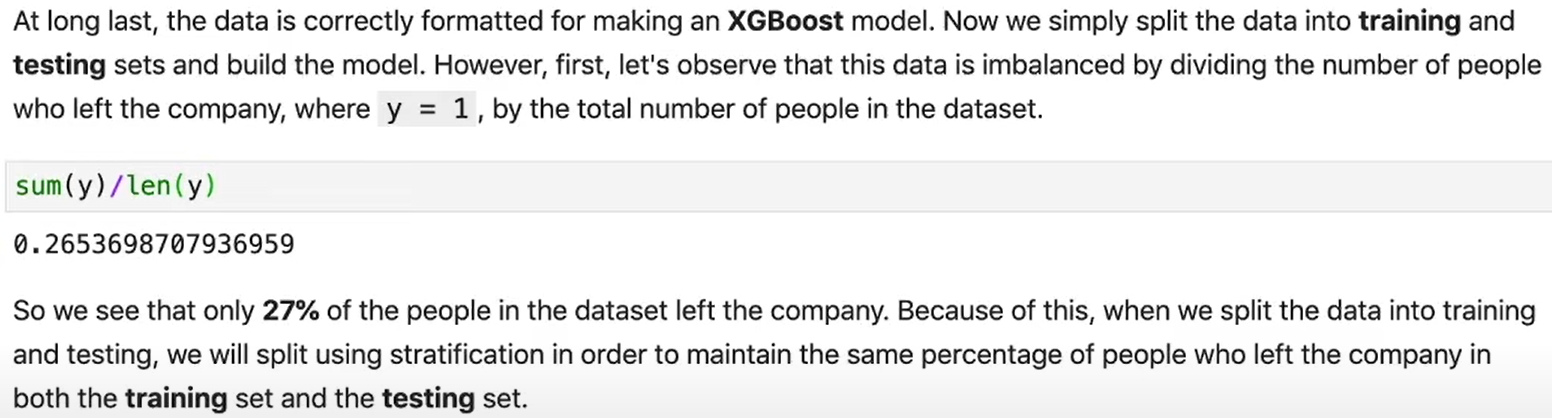

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=42, stratify=y)

In [37]:
X_train.shape

(5282, 1178)

In [38]:
y_train.shape

(5282,)

In [39]:
X_test.shape

(1761, 1178)

In [40]:
sum(y_train)/len(y_train)

0.2654297614539947

In [41]:
sum(y_test)/len(y_test)

0.26519023282226006

both y_train and y_test have same percentage of people leaving

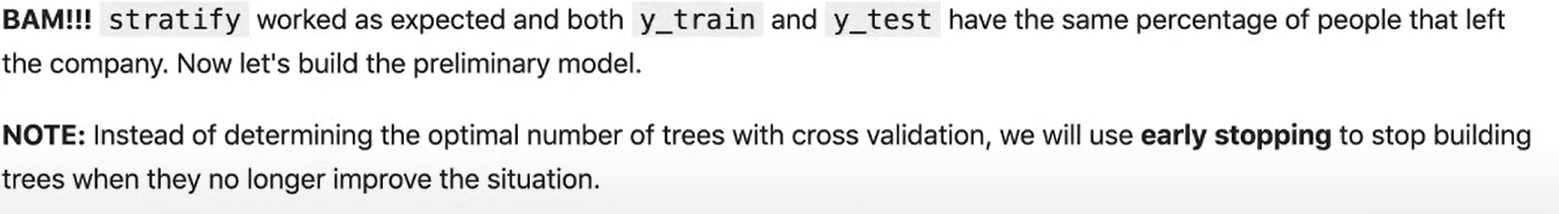

In [42]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',random_state=42) 
#logistic regression
# missing  means what characters we are using to display missing values

In [43]:
clf_xgb.fit(X_train,y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

# early_stopping_rounds = if accuracy is not improving then after that build 10 tress and stop if none of them is improving
# eval_metric='aucpr', we are auc to see how well predictions are being made.

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65052
[4]	validation_0-aucpr:0.65321
[5]	validation_0-aucpr:0.64854
[6]	validation_0-aucpr:0.65459
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65850
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66527
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66000
[15]	validation_0-aucpr:0.66027
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65593
[18]	validation_0-aucpr:0.65738
[19]	validation_0-aucpr:0.65829
[20]	validation_0-aucpr:0.65683
[21]	validation_0-aucpr:0.65707


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


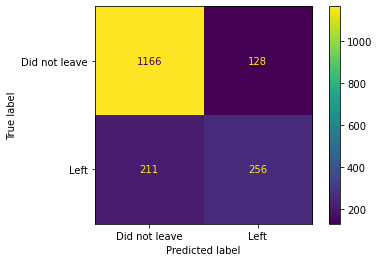

In [45]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Did not leave", "Left"])

In the Confusion matrix, we see that of the 1294 (1166 + 128) people that __did not leave, 1166 (90%)__ were correctly classified. And of the __467__ people that __left the company, 256 (54%)__ were correctly classified.So the XGBoost model was not awesome. Prat of the problem is that our data is imbalance, which we saw earlier and we see this in the confusion matrix with the top row showing __1294__ people that did not default and the bottom row showing __467__ people who did.


Because people Leaving costs the company a lot of money, we would like to capture more of the people who left. The good news is XGBoost has a paramter, scales_pos_weight, that helps with the imbalanced data. So, let's try to improve predictions using __Cross Validation__ to optimize the parameters.

## Optimizing using Cross Validation and GridSearch()

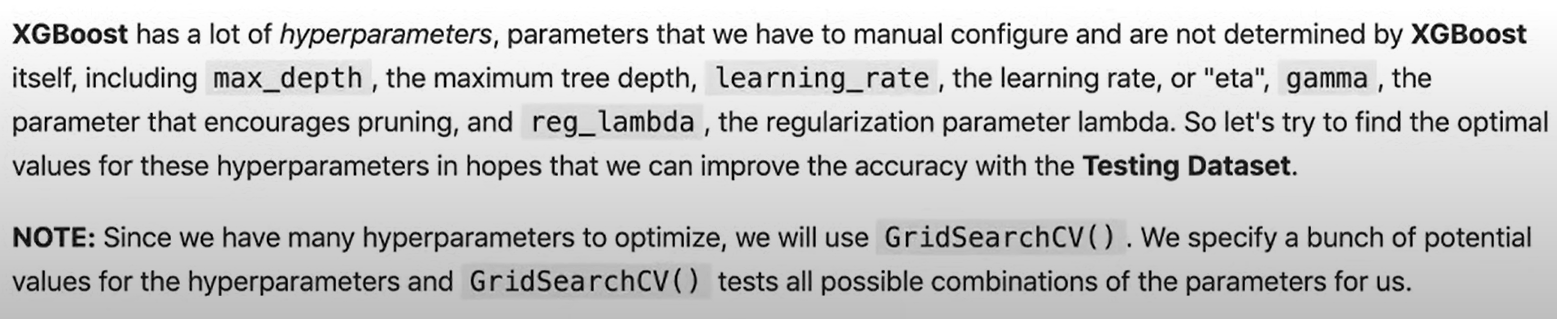

NOTE: when data is imbalanced, the XGBoost manual says:

If you care only about the overall performance metric (AUC) of your prediction, the:

- Balance the positive and negative weights via __scale_pos_weight__

- Use __AUC__ for evaluation 


Also Note: I ran GridSearchCV sequentially on subsets of parameter options, rather than all the at once in order to optimize parameters in a short period of time.

In [46]:
# Round 1

param_grid = {
    'max_depth' : [3,4,5],
    'learning_rate' : [0.1,0.05,0.01],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda' : [0, 1.0, 10.0],
    'scale_pos_weight' : [1,3,5]
}

# Note: XGBoost recommends sum(negative instances) / sum(positive instances)

In [47]:
optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective='binary:logistic', 
                                  seed=42, 
                                  subsample = 0.9, 
                                  colsample_bytree = 0.5), 
param_grid = param_grid,
scoring='roc_auc',
verbose=0,
n_jobs=-1,
cv=3
)

##### Will take toooooooooo much time

In [48]:
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(X_test,y_test)],
                  verbose=False)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='roc_auc')

In [49]:
optimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

Adjusting parametrs whose results are on the edge of the range

In [50]:
# Round 2

param_grid1 = {
    'max_depth' : [4],
    'learning_rate' : [0.1,0.05,0.01],
    'gamma': [0.25],
    'reg_lambda' : [10.0, 20, 100],
    'scale_pos_weight' : [3]
}

In [51]:
optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective='binary:logistic', 
                                  seed=42, 
                                  subsample = 0.9, 
                                  colsample_bytree = 0.5), 
param_grid = param_grid1,
scoring='roc_auc',
verbose=0,
n_jobs=-1,
cv=3
)

In [52]:
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(X_test,y_test)],
                  verbose=False)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.25], 'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [4], 'reg_lambda': [10.0, 20, 100],
                         'scale_pos_weight': [3]},
             scoring='roc_auc')

In [53]:
optimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.05,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 3}

Note: To speed up cross validation and to further prevent overftting, we are only using a random subset of the data (90%) and are only using a random subset of the features (columns) (50%) per tree.

## Building, Evaluating, Drawing, Interpreting the Optimized XGBoost Model

In [54]:
clf_xgb = xgb.XGBClassifier(seed = 42,
                           objective = 'binary:logistic',
                           gamma=0.25,
                           learn_rate=0.1,
                           max_depth=4,
                           reg_lambda=10,
                           scale_pos_weight=3,
                           subsample=0.9,
                           colsample_bytree=0.5)

In [55]:
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[20:46:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.56622
[1]	validation_0-aucpr:0.59634
[2]	validation_0-aucpr:0.62538
[3]	validation_0-aucpr:0.63059
[4]	validation_0-aucpr:0.63627
[5]	validation_0-aucpr:0.64668
[6]	validation_0-aucpr:0.64032
[7]	validation_0-aucpr:0.64428
[8]	validation_0-aucpr:0.64448
[9]	validation_0-aucpr:0.65640
[10]	validation_0-aucpr:0.65543
[11]	validation_0-aucpr:0.66453
[12]	validation_0-aucpr:0.66361
[13]	validation_0-aucpr:0.66424
[14]	validation_0-aucpr:0.66289
[15]	validation_0-aucpr:0.66315
[16]	validation_0-aucpr:0.66231
[17]	validation_0-aucpr:0.66141
[18]	validation

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

In [56]:
clf_xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)>

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


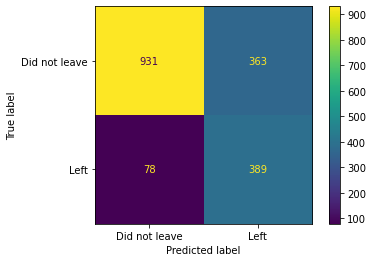

In [57]:
plot_confusion_matrix(clf_xgb,
                    X_test,
                    y_test,
                    values_format='d',
                    display_labels=["Did not leave", "Left"])

We see that the optimized __XGBoost__ model is a lot better at identifying people that left the company. Of that __467__ people that left the company, __389 (84%)__ were correctly identified. Before optimization we correctly identified __256 (54%)__. However this improvement was at expanse of not being able to correctly classify as many people that did not leave.

Before optimization we we correctly classified __1166 (90%)__ people that did not leave. Now we only classify __931(72%)__ That being said this trade off may be better for the company beacuse now it can focus resources on the people that leave if that will help them reatain them.

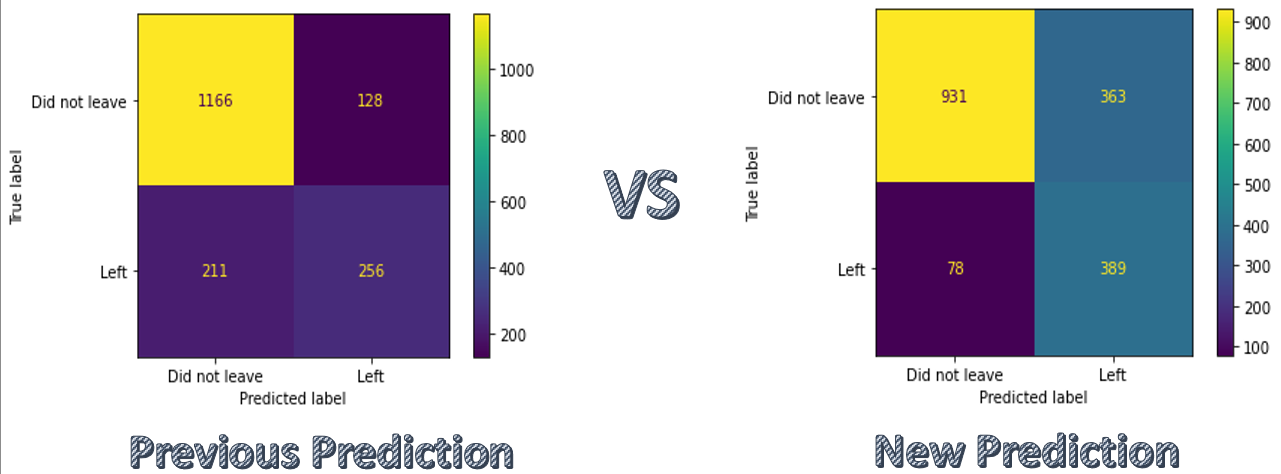

## XGBoost TREE

In [58]:
clf_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma = 0.25,
                           learn_rate = 0.1,
                           max_depth = 4,
                           reg_lambda = 10,
                           scale_pos_weight =3,
                           subsample=0.9,
                           colsample_bytree=0.5,
                           n_estimators=1)

# we set n_estimator as 1 to get the gain and cover

In [59]:
clf_xgb.fit(X_train,y_train)

[20:46:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

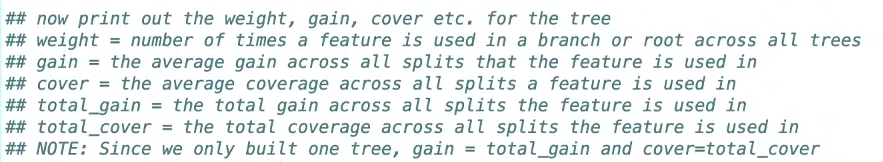

In [60]:
bst = clf_xgb.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: '%importance_type, bst.get_score(importance_type=importance_type))

weight:  {'Latitude': 1.0, 'Tenure_Months': 5.0, 'Monthly_Charges': 2.0, 'Senior_Citizen_No': 1.0, 'Internet_Service_DSL': 2.0, 'Internet_Service_Fiber_optic': 1.0, 'Tech_Support_No': 1.0, 'Contract_One_year': 1.0, 'Contract_Two_year': 1.0}
gain:  {'Latitude': 6.79351806640625, 'Tenure_Months': 112.87569427490234, 'Monthly_Charges': 13.62578010559082, 'Senior_Citizen_No': 14.307220458984375, 'Internet_Service_DSL': 85.56890869140625, 'Internet_Service_Fiber_optic': 134.15879821777344, 'Tech_Support_No': 1133.810546875, 'Contract_One_year': 13.28778076171875, 'Contract_Two_year': 252.51153564453125}
cover:  {'Latitude': 219.75, 'Tenure_Months': 413.95001220703125, 'Monthly_Charges': 148.875, 'Senior_Citizen_No': 98.75, 'Internet_Service_DSL': 538.75, 'Internet_Service_Fiber_optic': 484.0, 'Tech_Support_No': 1820.25, 'Contract_One_year': 470.5, 'Contract_Two_year': 742.75}
total_gain:  {'Latitude': 6.79351806640625, 'Tenure_Months': 564.3784790039062, 'Monthly_Charges': 27.25156021118164

In [61]:
node_params = {'shape':'box',## make the nodes fancy
              'style':'filled, rounded',
              'fillcolor':'#78cbe'}

leaf_params = {'shape':'box',## make the nodes fancy
              'style':'filled, rounded',
              'fillcolor':'#e48038'}

#### NOTE: 

__num_trees__ is NOT the number of trees to plot, but the specific tree you want to plot. The default value is 0, just setting it to show it is counter-intuitive

In [62]:
xgb.to_graphviz(clf_xgb, num_trees=0, size = "10,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

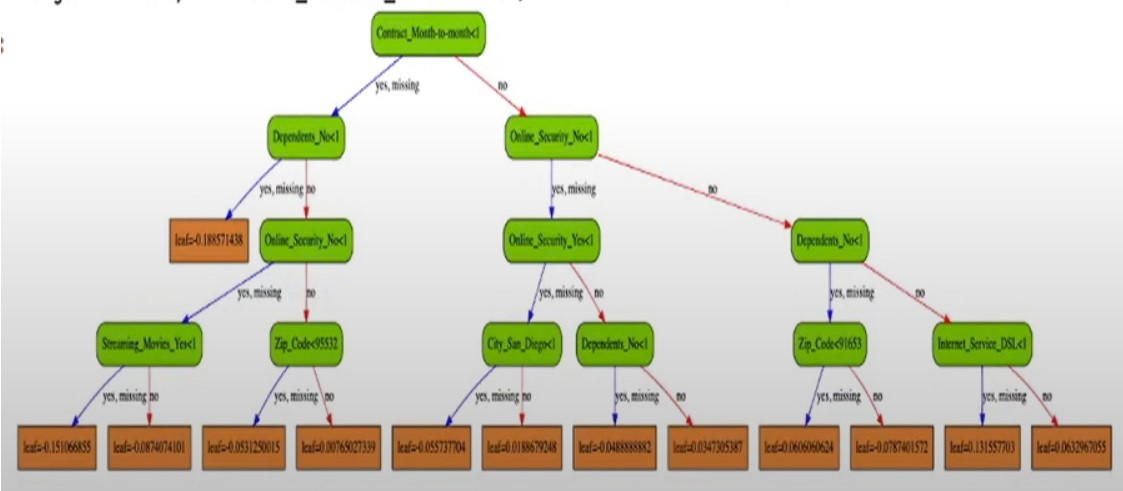

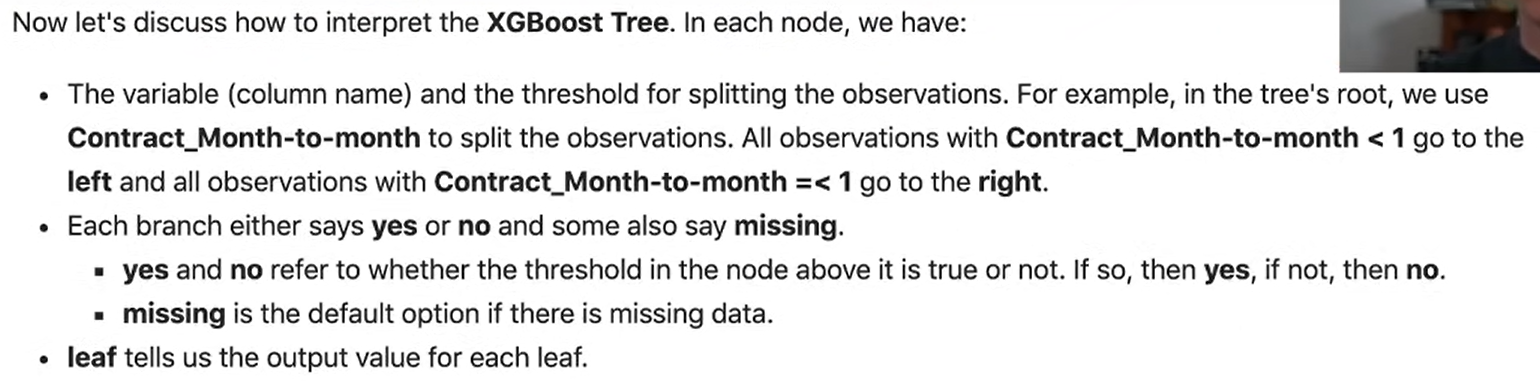

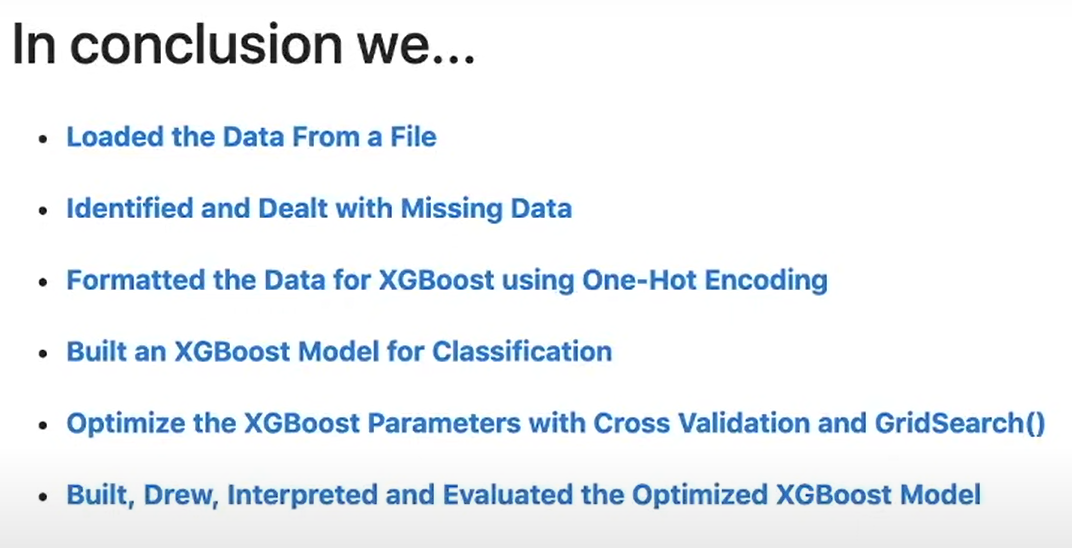